In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from pandas import DataFrame
from pandas import concat
import pmdarima as pm

# ARIMA Prediction

In [26]:
#autoarima model
def arimamodel(timeseries):
    automodel = pm.auto_arima(timeseries, 
                              start_p=1, 
                              start_q=1,
                              test="adf",
                              seasonal=False,
                              trace=True)
    return automodel

In [27]:
#plot the plot
def plotarima(n_periods, timeseries, automodel):
    # Forecast
    fc, confint = automodel.predict(n_periods=n_periods, return_conf_int=True)
    # Weekly index
    fc_ind = pd.date_range(timeseries.index[timeseries.shape[0]-1], periods=n_periods, freq="Q")
    # Forecast series
    fc_series = pd.Series(fc, index=fc_ind)
    # Upper and lower confidence bounds
    lower_series = pd.Series(confint[:, 0], index=fc_ind)
    upper_series = pd.Series(confint[:, 1], index=fc_ind)
    # Create plot
    plt.figure(figsize=(10, 6))
    plt.plot(timeseries)
    plt.plot(fc_series, color="red")
    plt.xlabel("date")
    plt.ylabel("count")
    plt.fill_between(lower_series.index, 
                     lower_series, 
                     upper_series, 
                     color="k", alpha=.25)
    plt.legend(("past", "forecast", "95% confidence interval"), loc="upper left")
    plt.show()

In [326]:
ts = Input_c[Input.date <= '2012-01-01']
ts = ts.set_index('date')
ts

,count
date,
1985-03-31,5.0
1985-06-30,6.0
1985-09-30,6.0
1985-12-31,6.0
1986-03-31,5.0
...,...
2010-12-31,13.0
2011-03-31,17.0
2011-06-30,18.0


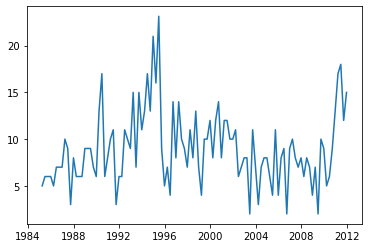

In [327]:
plt.plot(ts)

Text(0, 0.5, 'the number of patents')

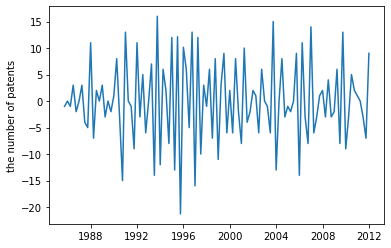

In [329]:
plt.plot(ts.diff().diff())
plt.ylabel("the number of patents")

Text(0, 0.5, 'the number of patents')

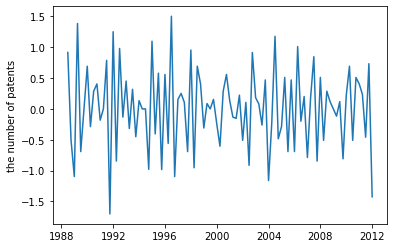

In [311]:
from numpy import log
#lts = (ts['count'])**(0.5)
lts = log(ts)
plt.plot(lts.diff())
plt.ylabel("the number of patents")

In [330]:
automodel = arimamodel(ts)
automodel.summary()

Performing stepwise search to minimize aic
Fit ARIMA: (1, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=586.062, BIC=596.754, Time=0.067 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=622.924, BIC=628.269, Time=0.189 seconds
Fit ARIMA: (1, 1, 0)x(0, 0, 0, 0) (constant=True); AIC=595.558, BIC=603.576, Time=0.031 seconds
Fit ARIMA: (0, 1, 1)x(0, 0, 0, 0) (constant=True); AIC=584.072, BIC=592.090, Time=0.039 seconds
Fit ARIMA: (0, 1, 0)x(0, 0, 0, 0) (constant=False); AIC=620.973, BIC=623.646, Time=0.009 seconds
Fit ARIMA: (0, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=586.065, BIC=596.757, Time=0.052 seconds
Fit ARIMA: (1, 1, 2)x(0, 0, 0, 0) (constant=True); AIC=588.051, BIC=601.415, Time=0.067 seconds
Total fit time: 0.466 seconds


c:\users\delia\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:949: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\users\delia\appdata\local\programs\python\python37\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:961: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Statespace Model Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  108
Model:               SARIMAX(0, 1, 1)   Log Likelihood                -289.036
Date:                Sun, 12 Apr 2020   AIC                            584.072
Time:                        22:00:24   BIC                            592.090
Sample:                             0   HQIC                           587.322
                                - 108                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0765      0.111      0.692      0.489      -0.140       0.293
ma.L1         -0.6878      0.054    -12.739      0.000      -0.794      -0.582
sigma2        12.9186      1.718      7.521      0.000       9.552      16.285
===================================================================================
Ljung-Box (Q):                       37.91   Jarque-Bera (JB):                 0.77
Prob(Q):                              0.56   Prob(JB):                         0.68
Heteroskedasticity (H):               1.17   Skew:                            -0.19
Prob(H) (two-sided):                  0.64   Kurtosis:                         3.16
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

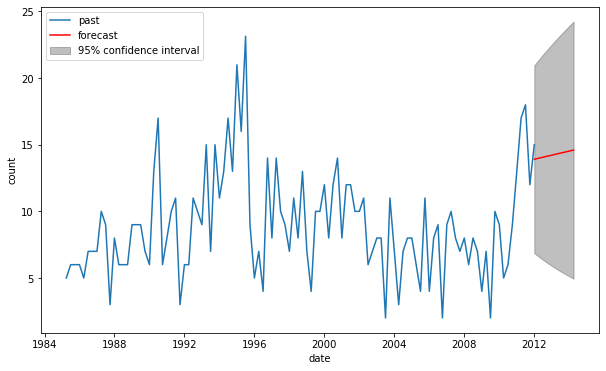

In [331]:
plotarima(10, ts, automodel)

In [332]:
import math  
y_true = Input['count'][Input.date >'2012-01-01'].values
#y_pred = np.exp(automodel.predict(n_periods=10, return_conf_int=False))-1
y_pred = automodel.predict(n_periods=10, return_conf_int=False)
#y_pred = (automodel.predict(n_periods=10, return_conf_int=False))**2
SSE = ((y_true - y_pred)**2).sum()
SSR = ((y_true - np.mean(ts.values))**2).sum()
OSR2 = 1-SSE/SSR
RMSE = math.sqrt(np.mean((y_true - y_pred)**2))
MAE = np.mean(abs((y_true - y_pred)))
print("OSR2: ", OSR2)
print("MAE: ", MAE)
print("RMSE: ", RMSE)

OSR2:  0.7085908587489367
MAE:  3.920512010033897
RMSE:  4.470567473064403
